In [49]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [50]:
retail = pd.read_csv('../06.Manipulation-and-data/online_retail2.csv')

In [51]:
retail = retail.drop_duplicates()

In [52]:
retail = retail.dropna(axis=0, how='any')

In [53]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [54]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [55]:
retail['InvoiceDate'].dt.year
retail['InvoiceDate'].dt.month
retail['InvoiceDate'].dt.day
retail['InvoiceDate'].dt.weekday

0          1
1          1
2          1
3          1
4          1
          ..
1067366    4
1067367    4
1067368    4
1067369    4
1067370    4
Name: InvoiceDate, Length: 797885, dtype: int32

In [56]:
retail['InvoiceDate'].dt.strftime('%W %Y')

0          48 2009
1          48 2009
2          48 2009
3          48 2009
4          48 2009
            ...   
1067366    49 2011
1067367    49 2011
1067368    49 2011
1067369    49 2011
1067370    49 2011
Name: InvoiceDate, Length: 797885, dtype: object

In [57]:
retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [58]:
retail['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [59]:
retail['InvoiceDate'].max() - retail['InvoiceDate'].min()

Timedelta('738 days 05:05:00')

In [60]:
### recency


#### max date of dataset

max_date = retail.InvoiceDate.max()
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [61]:
last_purchase_Date = retail.groupby('Customer ID', as_index=False)['InvoiceDate'].max()
last_purchase_Date['Recency'] = max_date - last_purchase_Date['InvoiceDate']
last_purchase_Date['Recency'].describe()

count                           5942
mean     202 days 10:33:55.930663076
std      211 days 21:00:52.495651984
min                  0 days 00:00:00
25%                 24 days 01:41:45
50%                 95 days 12:20:00
75%                380 days 22:12:00
max                738 days 02:55:00
Name: Recency, dtype: object

In [62]:
last_purchase_Date
last_purchase_Date['Recency_days'] = last_purchase_Date['Recency'].dt.components['days']

(array([2712.,  597.,  427.,  342.,  253.,  665.,  272.,  244.,  234.,
         196.]),
 array([  0. ,  73.8, 147.6, 221.4, 295.2, 369. , 442.8, 516.6, 590.4,
        664.2, 738. ]),
 <BarContainer object of 10 artists>)

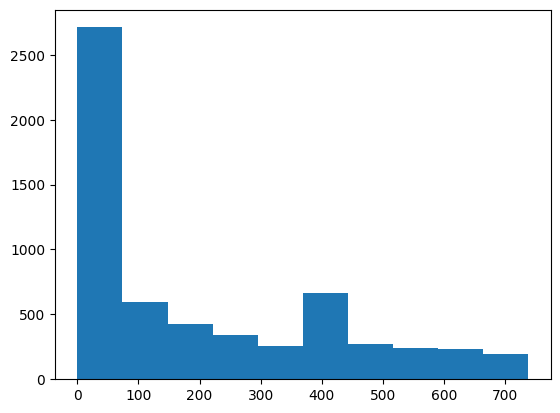

In [63]:
plt.hist(last_purchase_Date['Recency_days'])

In [64]:
### modelling
customers = np.unique(retail['Customer ID'])

In [65]:
len(customers)
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [66]:
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
customer_group = retail.groupby(['Customer ID','date'],
                                 as_index=False).count()[['Customer ID','date']]
customer_group

,Customer ID,date
0,12346.0,2009-12-14
1,12346.0,2009-12-18
2,12346.0,2010-01-04
3,12346.0,2010-01-14
4,12346.0,2010-01-22
...,...,...
38497,18287.0,2010-09-21
38498,18287.0,2010-11-22
38499,18287.0,2011-05-22
38500,18287.0,2011-10-12


In [68]:
inter_data = pd.DataFrame()

for customer in customers:
    c_d = customer_group[customer_group['Customer ID']== customer]
    c_d['previous_date'] = c_d['date'].shift(1)
    inter_data = pd.concat([inter_data,c_d],axis=0)

/var/folders/31/qz_1398945vdp87wycnnzg5c0000gn/T/ipykernel_12272/3754397113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d['previous_date'] = c_d['date'].shift(1)
/var/folders/31/qz_1398945vdp87wycnnzg5c0000gn/T/ipykernel_12272/3754397113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d['previous_date'] = c_d['date'].shift(1)
/var/folders/31/qz_1398945vdp87wycnnzg5c0000gn/T/ipykernel_12272/3754397113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [71]:
inter_data.columns

Index(['Customer ID', 'date', 'previous_date'], dtype='object')

In [79]:
inter_data.info()
inter_data['date'] = pd.to_datetime(inter_data['date'])
inter_data['previous_date'] = pd.to_datetime(inter_data['previous_date'])
inter_data['duration'] = inter_data['date'] - inter_data['previous_date']
inter_data['duration'] = inter_data['duration'].dt.components['days']
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries, 0 to 38501
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Customer ID    38502 non-null  float64        
 1   date           38502 non-null  datetime64[ns] 
 2   previous_date  32560 non-null  datetime64[ns] 
 3   duration       32560 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), timedelta64[ns](1)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries, 0 to 38501
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer ID    38502 non-null  float64       
 1   date           38502 non-null  datetime64[ns]
 2   previous_date  32560 non-null  datetime64[ns]
 3   duration       32560 non-null  float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 1.5 MB


In [81]:
inter_arrival = inter_data.groupby('Customer ID')['duration'].mean()
inter_arrival

Customer ID
12346.0     40.000000
12347.0     57.428571
12348.0     90.750000
12349.0    179.250000
12350.0           NaN
              ...    
18283.0     36.388889
18284.0      2.000000
18285.0           NaN
18286.0    123.500000
18287.0    116.000000
Name: duration, Length: 5942, dtype: float64

In [85]:
stocks = pd.read_csv('stocks.csv',index_col='Date',parse_dates=True)

In [87]:
stocks.info()
stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3521 non-null   float64
 1   IBM     3521 non-null   float64
 2   CSCO    3521 non-null   float64
 3   MSFT    3521 non-null   float64
dtypes: float64(4)
memory usage: 137.5 KB


,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.000000,108.062500,116.562500
2000-01-04,102.500003,112.062500,102.000000,112.625000
2000-01-05,103.999997,116.000000,101.687500,113.812500
2000-01-06,94.999998,114.000000,100.000000,110.000000
2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...
2013-12-24,567.669975,183.220001,21.690001,37.080002
2013-12-26,563.900009,185.350006,21.799999,37.439999
2013-12-27,560.089989,185.080002,22.020000,37.290001


<Axes: xlabel='Date'>

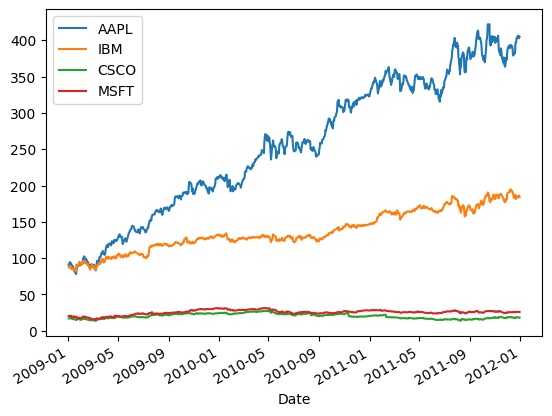

In [93]:
stocks['2009':'2011'].plot()

<Axes: xlabel='Date'>

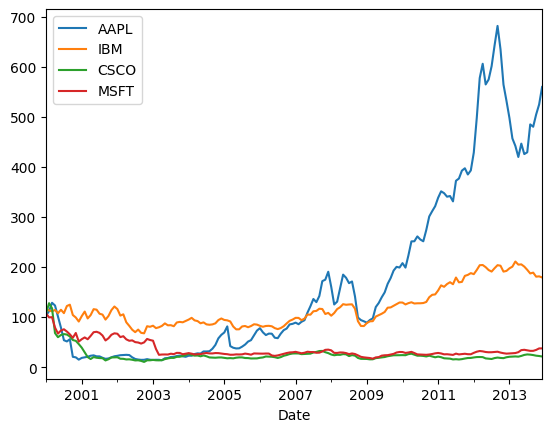

In [96]:
monthly_series_mean = stocks.resample('M').mean()
year_series_mean = stocks.resample('Y').mean()
quarter_series_mean = stocks.resample('W').mean()
monthly_series_mean.plot()

In [98]:
#sum() , first(), last(),

quarter_series_sum = stocks.resample('W').sum()
quarter_series_sum

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-09,512.937501,571.562500,517.625000,564.437500
2000-01-16,474.875001,594.375000,533.875000,547.500000
2000-01-23,435.312493,475.750000,451.937500,432.062500
2000-01-30,540.312514,582.437500,538.875000,500.437500
2000-02-06,514.124998,568.500000,580.125000,511.812500
...,...,...,...,...
2013-12-08,2810.469986,883.050003,105.790001,192.060002
2013-12-15,2808.309937,875.949997,104.059997,188.340001
2013-12-22,2756.739997,892.550003,104.799999,183.040000


/var/folders/31/qz_1398945vdp87wycnnzg5c0000gn/T/ipykernel_12272/1980441687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT['rolling_weekly'] = MSFT.rolling(window=7).mean()
/var/folders/31/qz_1398945vdp87wycnnzg5c0000gn/T/ipykernel_12272/1980441687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window=30).mean()


<Axes: xlabel='Date'>

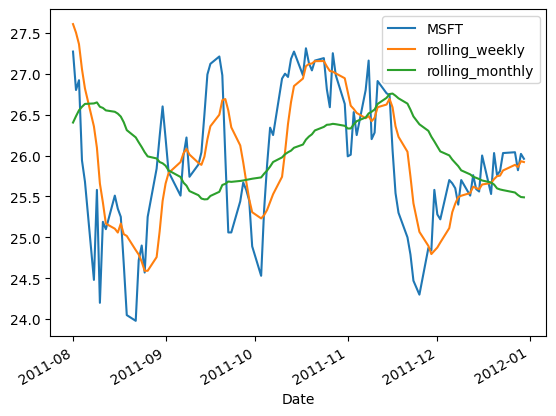

In [106]:
MSFT = stocks[['MSFT']]
MSFT['rolling_weekly'] = MSFT.rolling(window=7).mean()
MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window=30).mean()
MSFT['Aug-2011':'Dec-2011'].plot()